/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_75093/3580887815.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index = pd.date_range(start='2022-12-21 22:00:00', periods=100, freq='H')


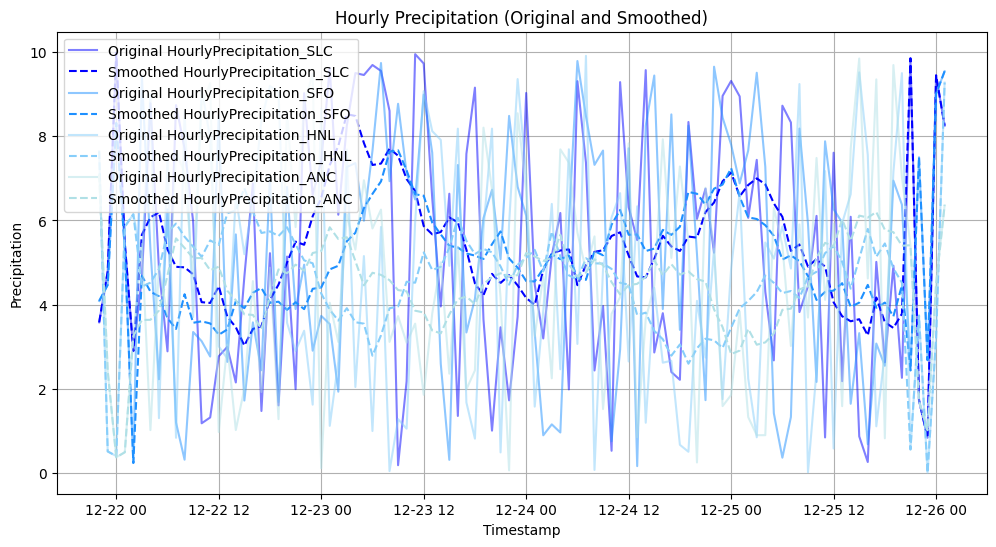

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def custom_smooth(series, window_size=10):
    # Calculate the moving average with a centered window
    smooth_series = series.rolling(window=window_size, center=True).mean()
    
    # Fill the NaN values at the edges with original values
    smooth_series[:window_size//2] = series[:window_size//2]
    smooth_series[-window_size//2:] = series[-window_size//2:]
    
    return smooth_series

# Sample DataFrame creation for illustration purposes
data = {
    'HourlyPrecipitation_SLC': np.random.rand(100) * 10,  # Sample spiky data
    'HourlyPrecipitation_SFO': np.random.rand(100) * 10,
    'HourlyPrecipitation_HNL': np.random.rand(100) * 10,
    'HourlyPrecipitation_ANC': np.random.rand(100) * 10
}
index = pd.date_range(start='2022-12-21 22:00:00', periods=100, freq='H')
df = pd.DataFrame(data, index=index)

# Apply smoothing
smoothed_df = df.apply(custom_smooth)

# Plotting
plt.figure(figsize=(12, 6))

# Colors in different shades of blue
colors = ['#0000FF', '#1E90FF', '#87CEFA', '#B0E0E6']

# Plot each original and smoothed column
for i, column in enumerate(df.columns):
    plt.plot(df.index, df[column], label=f'Original {column}', color=colors[i], alpha=0.5)
    plt.plot(df.index, smoothed_df[column], label=f'Smoothed {column}', color=colors[i], linestyle='dashed')

plt.title('Hourly Precipitation (Original and Smoothed)')
plt.xlabel('Timestamp')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()
